In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 200)

In [169]:
df = pd.read_csv('./testbed/data/malicious_dataset.csv')
attack_classes = pd.read_csv("./testbed/data/attack_labels.csv")
normal = pd.read_csv('./mawilab/data/normal_dataset.csv')
df.head(1)

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val
0,1,"Dec 31, 1969 21:03:41.953641000 -03",221.953641,20,58,58,0x00000800,4,20,NaN,0x0000b2c5,0x00000000,0,0,0,0,46,6,0x000019e0,172.16.0.3,10.10.10.10,44,0x00000000,62218,8888,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00005cb1,0,1460.0


In [170]:
attack_classes['label'].unique()

array(['nmap_tcp_syn', 'nmap_tcp_conn', 'nmap_tcp_null', 'nmap_tcp_xmas',
       'nmap_tcp_fin', 'nmap_tcp_ack', 'nmap_tcp_window',
       'nmap_tcp_maimon', 'unicornscan_tcp_syn', 'unicornscan_tcp_conn',
       'unicornscan_tcp_null', 'unicornscan_tcp_xmas',
       'unicornscan_tcp_fxmas', 'unicornscan_tcp_fin',
       'unicornscan_tcp_ack', 'hping_tcp_syn', 'hping_tcp_null',
       'hping_tcp_xmas', 'hping_tcp_fin', 'hping_tcp_ack', 'zmap_tcp_syn',
       'masscan_tcp_syn', 'nmap_ping_scan', 'nmap_vvv', 'nmap_connect',
       'nmap_fast', 'nmap_servinfo', 'nmap_reason', 'nmap_open',
       'nmap_top10', 'nmap_fragv', 'nmap_mtu', 'nmap_spoof_idle',
       'nmap_decoy', 'nmap_noping', 'nmap_udping', 'nmap_ack_syn',
       'nmap_syn', 'nmap_ipproto', 'nmap_udp', 'nmap_null', 'nmap_fin',
       'nmap_stealth', 'nmap_spoof_mac', 'nmap_fake_srcprt',
       'nmap_data_length', 'nmap_bad_checksum', 'nmap_random_host',
       'nmap_iflist', 'nmap_fw_bypass', 'nmap_firewalk',
       'nmap_http

In [171]:
df_labeled = df.merge(attack_classes, how='inner', left_on='ip.src', right_on='ip')
df_labeled.drop(['ip'], axis=1, inplace=True)
df_labeled.head(2)

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Dec 31, 1969 21:03:41.953641000 -03",221.953641,20,58,58,0x00000800,4,20,NaN,0x0000b2c5,0x00000000,0,0,0,0,46,6,0x000019e0,172.16.0.3,10.10.10.10,44,0x00000000,62218,8888,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00005cb1,0,1460.0,nmap_tcp_syn
1,1,"Dec 31, 1969 21:03:41.953762000 -03",221.953762,21,58,58,0x00000800,4,20,NaN,0x0000d3a4,0x00000000,0,0,0,0,37,6,0x00000201,172.16.0.3,10.10.10.10,44,0x00000000,62218,587,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00007d1e,0,1460.0,nmap_tcp_syn


In [172]:
normal['label'] = "normal"
normal.head(2)

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.0,51883.0,1.0,1.0,1400.0,20.0,0x00000010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN,normal
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,0x0000b6f2,0x00000000,0.0,0.0,0.0,0.0,247.0,6.0,0x00003220,89.8.230.210,163.221.247.4,40.0,0x00000000,53026.0,57963.0,0.0,0.0,0.0,20.0,0x00000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN,normal


In [173]:
if (df_labeled.columns == normal.columns).all():
    examples_malicious = df_labeled.shape[0]
    examples_legitim = normal.shape[0]
    total = examples_malicious+examples_legitim
    print('Total examples of {0} with {1:0.2f} of malicious and {2:0.2f} legitim packets'.format(total, examples_malicious/total, examples_legitim/total))

Total examples of 140163 with 0.26 of malicious and 0.74 legitim packets


## Pre-processing

In [174]:
fields = ['eth.type', 'ip.id', 'ip.flags', 'ip.checksum', 'ip.dsfield', 'tcp.flags', 'tcp.checksum']

for field in fields:
    df_labeled[field] = df_labeled[field].apply(lambda x: int(str(x), 16))
    

In [176]:
normal = normal.fillna(0)
for field in fields:
    normal[field] = normal[field].apply(lambda x: int(str(x), 16))

In [202]:
full_data = pd.concat([normal, df_labeled])

## Exploratory Data Analysis

/home/drwxr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/drwxr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/drwxr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

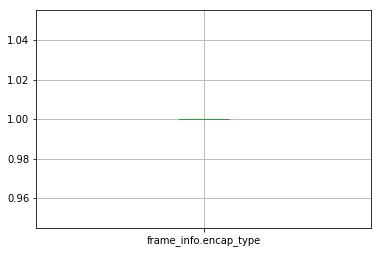

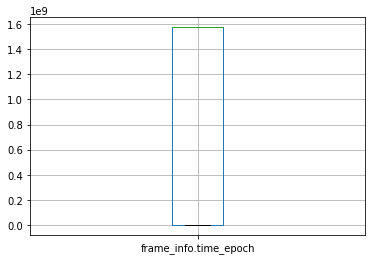

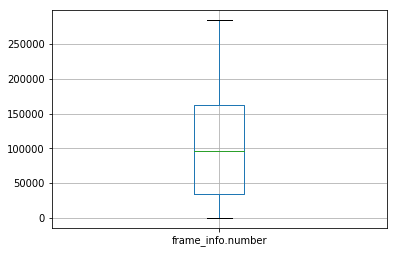

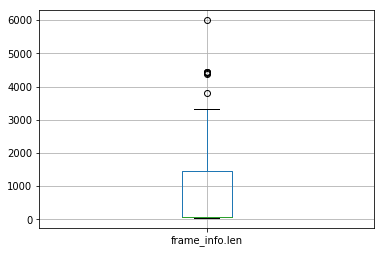

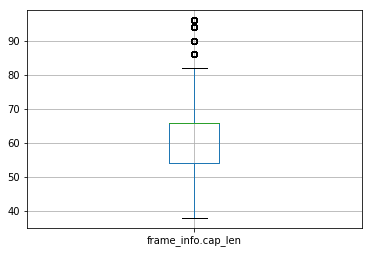

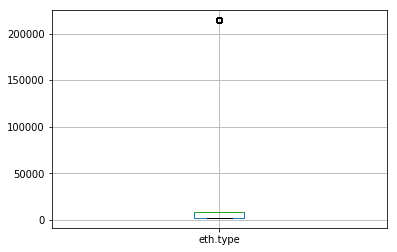

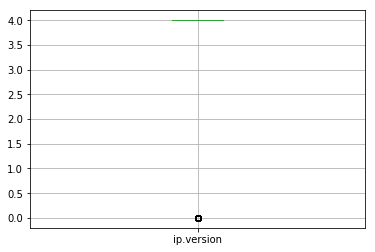

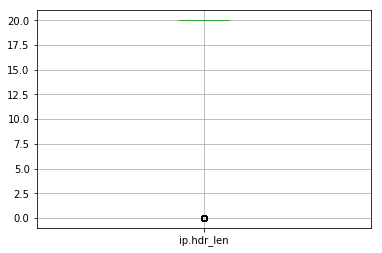

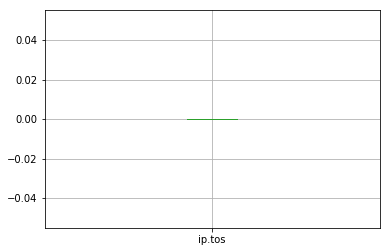

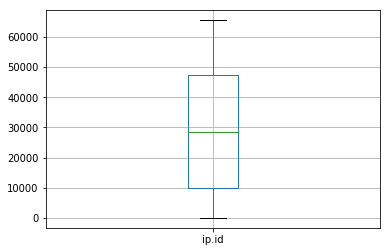

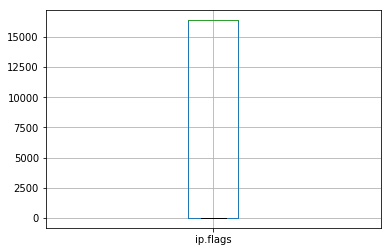

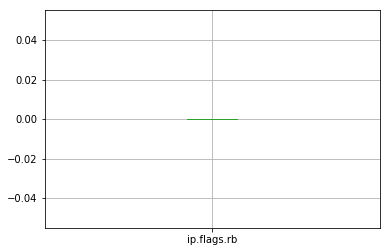

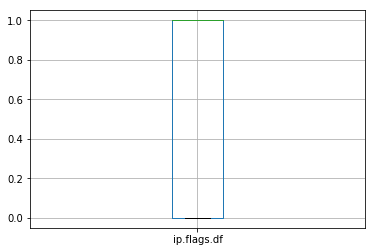

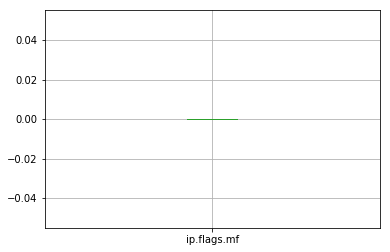

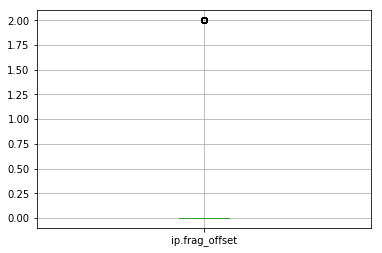

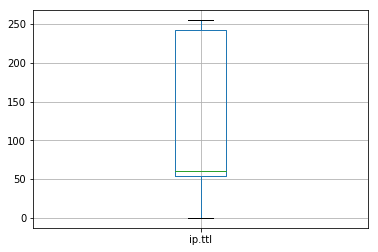

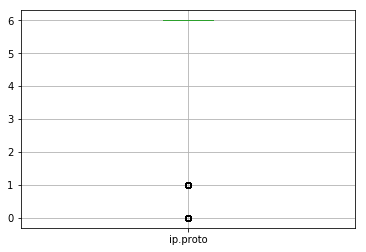

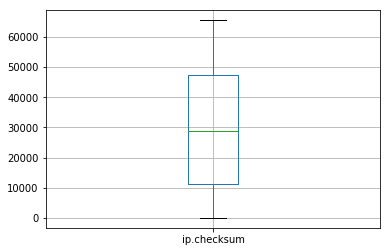

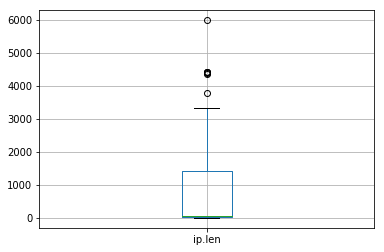

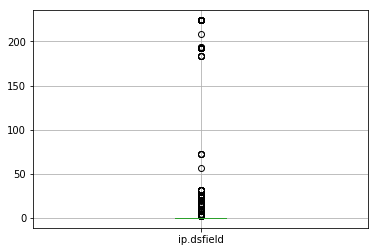

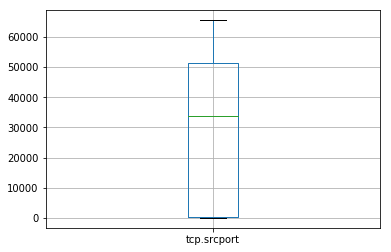

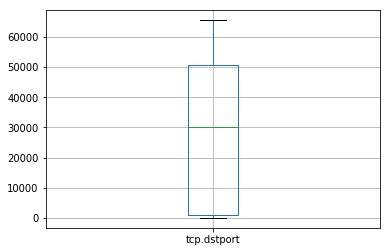

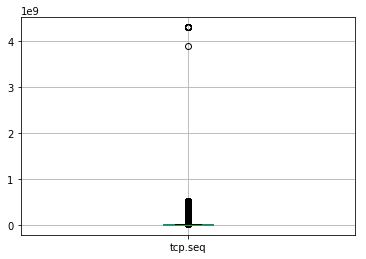

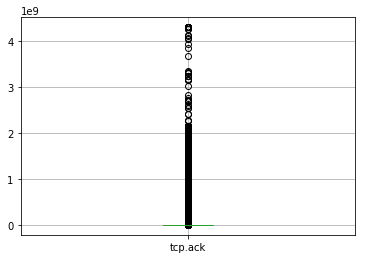

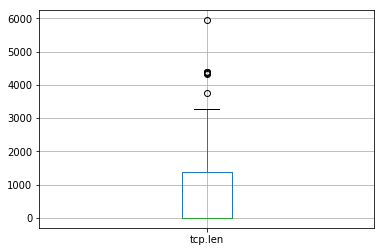

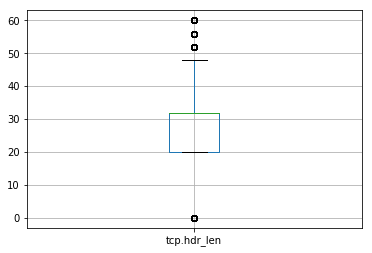

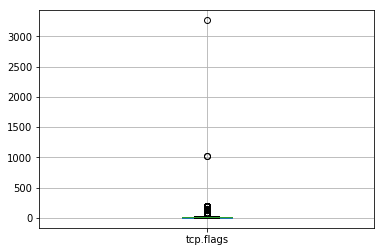

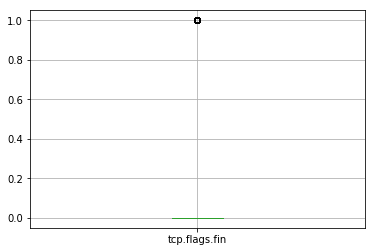

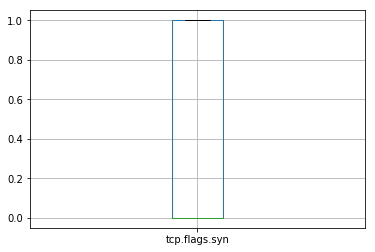

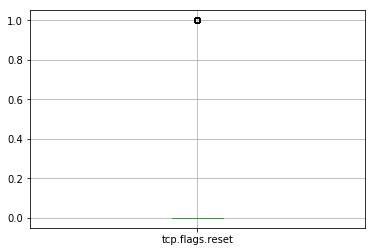

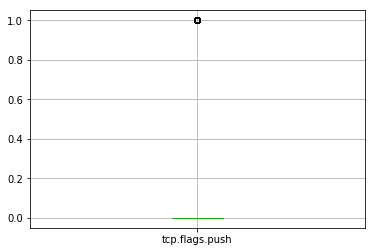

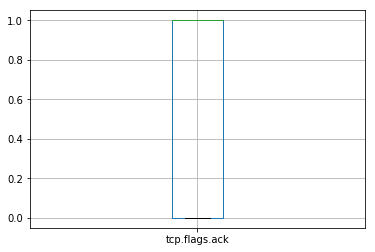

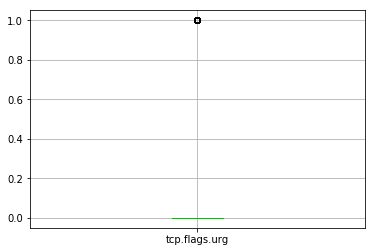

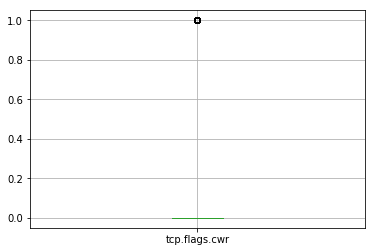

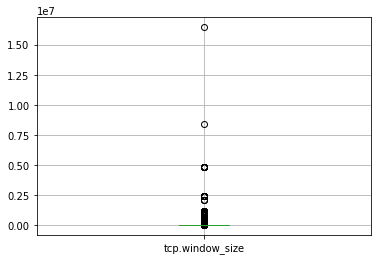

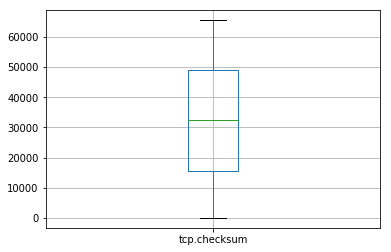

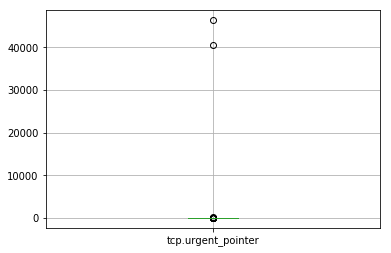

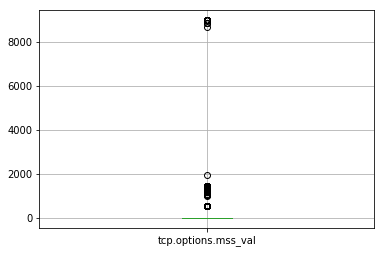

In [216]:
relevant_columns = list((full_data.var() > 0).index)

for column in relevant_columns:
    plt.figure();
    full_data.boxplot([column]);

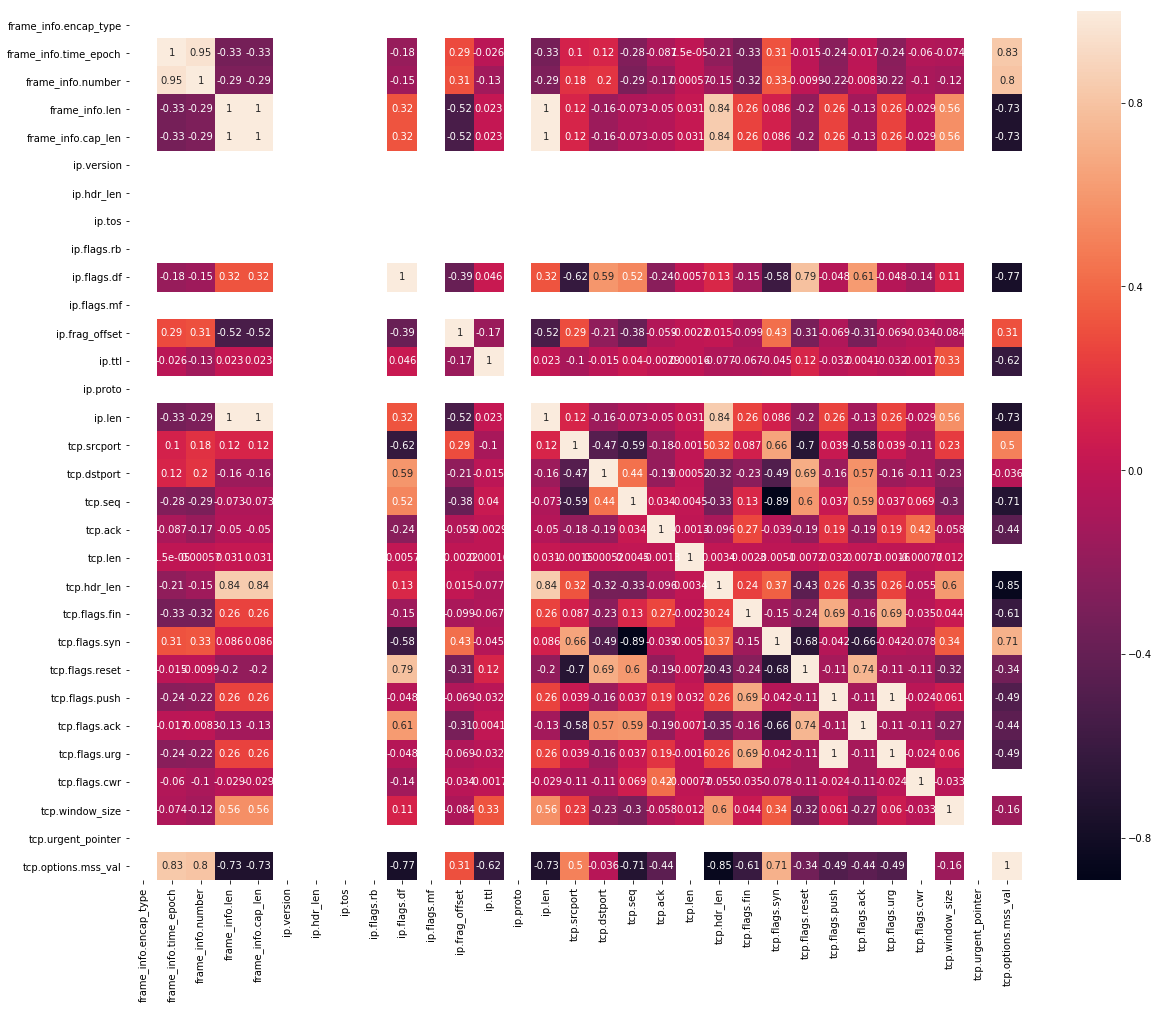

In [233]:
import seaborn as sns

Var_Corr = df.corr()

# plot the heatmap and annotation on it
plt.figure(figsize = (20,16))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

## ML Evaluation

In [217]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

algorithms = {
    "SVM": (SVC(), {"C": [1, 10], "kernel": ("linear", "rbf")}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "DT" : (DecisionTreeClassifier(), {"criterion": ("gini", "entropy"), "max_depth": [5, 10, 20] })
}

In [222]:
X = full_data[relevant_columns]
y = full_data['label']

In [224]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17) # Train, Test
gskf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17) # Validation
perf = accuracy_score

score = {}
for algorithm in algorithms.keys():
    score[algorithm] = []
       
for algorithm, (clf, parameters) in algorithms.items():
    for train, test in kf.split(X, y):
        prep = StandardScaler()
        prep.fit(X[train])
        best = GridSeachCV(clf, parameters, cv=gskf, scoring=make_scorer(perf))
        best.fit(prep.transform(X[train]), y[train])
        score[algorithm].append(perf(best.predict(prep.transform(X[test])), y[test]))

KeyError: "None of [Int64Index([     0,      2,      3,      4,      7,      8,      9,     10,\n                11,     12,\n            ...\n            140153, 140154, 140155, 140156, 140157, 140158, 140159, 140160,\n            140161, 140162],\n           dtype='int64', length=126132)] are in the [columns]"

In [225]:
pd.DataFrame.from_dict(score)

,SVM,KNN,DT


In [226]:
pd.DataFrame.from_dict(score).rank(axis=1, ascending=False)

,SVM,KNN,DT
